# 1 Monte Carlo Simulation
## 1.2 Data Cration and Visualization

In [326]:
import numpy as np
import matplotlib.pyplot as plt

In [327]:
def create_data(N):
    # Create N uniformly distributed random numbers
    U = np.random.rand(N)
    
    # Get the X variables with the respective distribution
    X0 = 1 - np.sqrt(1-U)
    X1 = np.sqrt(U)
    
    # Create N random numbers 0 or 1 with probability 0.5
    Y = np.random.rand(N)
    Y[Y < 0.5] = 0
    Y[Y >= 0.5] = 1
    
    # Pick a random X0 when Y=0
    # Pick a random X1 when Y=1
    X = X0
    X[Y == 1] = X1[Y == 1]

    return [X, Y]

In [328]:
#Define Threshold classifier A
def thresh_class_A(x,t):
    y=1
    if x<t:
        y=0
    return y

#Define Thresshold Classifier B
def thresh_class_B(x,t):
    y=1
    if x >= t:
        y=0
    return y

#Calculate Error of A and B for different thresholds and same Data set
def calc_error(data_set,thresh):
    error_res=np.array([[],[]])
    for t in thresh:
        error = np.array([[0],[0]])
        for i in range(len(data_set[0])):
            if thresh_class_A(data_set[0][i],t) != data_set[1][i]:
                error[0][0] += 1
            if thresh_class_B(data_set[0][i],t) != data_set[1][i]:
                error[1][0] += 1
        error_res = np.append(error_res,error,axis=1)
    return error_res/len(data_set[0])

In [329]:
#analytical errorfunction for different thresholds and calssifier A and B
def calc_error_analytic_A(thresh):
    error_ana = np.array([])
    for t in thresh:
        error_ana = np.append(error_ana,0.25+(t-0.5)**2)
    return error_ana

def calc_error_analytic_B(thresh):
    error_ana = np.array([])
    for t in thresh:
        error_ana = np.append(error_ana,0.75-(t-0.5)**2)
    return error_ana

In [330]:
thresh = [0.2,0.5,0.6]

In [331]:
M = [10,100,1000,10000]
error_res_A = np.zeros((len(M),len(thresh),10))
error_res_B = np.zeros((len(M),len(thresh),10))

for i in range(len(M)):
    error_res10_A = np.zeros((10,len(thresh)))
    error_res10_B = np.zeros((10,len(thresh)))
    for j in range(10):
        error_res10_A[j]=calc_error(create_data(M[i]),thresh)[0]
        error_res10_B[j]=calc_error(create_data(M[i]),thresh)[1]
    error_res_A[i] = error_res10_A.T
    error_res_B[i] = error_res10_B.T
print(error_res_A)
print(error_res_B)

[[[0.4    0.3    0.     0.4    0.5    0.4    0.1    0.3    0.1    0.2   ]
  [0.2    0.2    0.2    0.1    0.1    0.5    0.2    0.3    0.1    0.3   ]
  [0.2    0.2    0.2    0.1    0.2    0.6    0.2    0.3    0.1    0.3   ]]

 [[0.33   0.36   0.39   0.39   0.27   0.3    0.3    0.36   0.45   0.31  ]
  [0.22   0.27   0.25   0.31   0.17   0.24   0.26   0.24   0.24   0.23  ]
  [0.21   0.33   0.29   0.26   0.24   0.21   0.36   0.29   0.16   0.27  ]]

 [[0.348  0.356  0.337  0.395  0.338  0.328  0.359  0.345  0.362  0.338 ]
  [0.272  0.228  0.251  0.269  0.244  0.251  0.269  0.227  0.257  0.26  ]
  [0.275  0.238  0.258  0.265  0.254  0.27   0.267  0.244  0.259  0.274 ]]

 [[0.3435 0.3461 0.3405 0.3476 0.3449 0.3464 0.3332 0.337  0.3501 0.3463]
  [0.2577 0.2674 0.25   0.2466 0.2505 0.2555 0.2507 0.2441 0.2596 0.2448]
  [0.2653 0.2699 0.2595 0.2516 0.2616 0.2644 0.2619 0.2553 0.2672 0.2516]]]
[[[0.5    0.7    0.9    0.5    0.5    0.7    0.7    0.5    0.9    0.5   ]
  [0.7    0.7    0.6    0.8   

In [332]:
mean_std_A = np.zeros((len(M),len(thresh),2))
mean_std_B = np.zeros((len(M),len(thresh),2))
for i in range(len(M)):
    for j in range(len(thresh)):
        mean_std_A[i,j] = [np.mean(error_res_A[i,j]),np.std(error_res_A[i,j])]
        mean_std_B[i,j] = [np.mean(error_res_B[i,j]),np.std(error_res_B[i,j])]


[0.34 0.25 0.26]


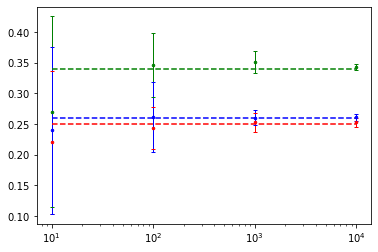

In [333]:
print(calc_error_analytic_A(thresh))

plt.errorbar(M,mean_std_A[:,0,0],yerr=mean_std_A[:,0,1],fmt=".",color="g",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.errorbar(M,mean_std_A[:,1,0],yerr=mean_std_A[:,1,1],fmt=".",color="r",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.errorbar(M,mean_std_A[:,2,0],yerr=mean_std_A[:,2,1],fmt=".",color="b",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.plot([10,10000],[0.34,0.34],"--",color="g")
plt.plot([10,10000],[0.25,0.25],"--",color="r")
plt.plot([10,10000],[0.26,0.26],"--",color="b")
plt.xscale("log")

[0.66 0.75 0.74]


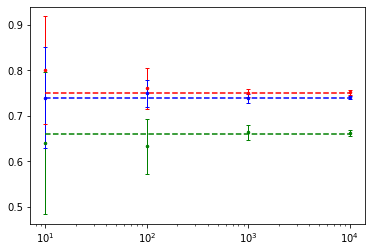

In [336]:
print(calc_error_analytic_B(thresh))

plt.errorbar(M,mean_std_B[:,0,0],yerr=mean_std_B[:,0,1],fmt=".",color="g",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.errorbar(M,mean_std_B[:,1,0],yerr=mean_std_B[:,1,1],fmt=".",color="r",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.errorbar(M,mean_std_B[:,2,0],yerr=mean_std_B[:,2,1],fmt=".",color="b",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.plot([10,10000],[0.66,0.66],"--",color="g")
plt.plot([10,10000],[0.75,0.75],"--",color="r")
plt.plot([10,10000],[0.74,0.74],"--",color="b")
plt.xscale("log")